In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
!from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

from: can't read /var/mail/catboost


In [ ]:
df = pd.read_csv("/content/preprocessed_1_time.csv",on_bad_lines='skip')


In [ ]:
df = df.reset_index()
df.fillna(0, inplace=True)
Y = df["Summary"]
X = df.drop(["Summary"], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler object on the data
scaler.fit(X)

# transform the data to standard scale
X_std = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [ ]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({1.0: 17049, 2.0: 13479, 3.0: 8109, 4.0: 6459, 5.0: 3798})
The number of classes after fit Counter({5.0: 17049, 2.0: 17049, 4.0: 17049, 1.0: 17049, 3.0: 17049})


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Create a pipeline for standardization and KNN
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# Set hyperparameters for KNN
params = {'knn__n_neighbors': [3, 5, 7], 'knn__weights': ['uniform', 'distance']}

# Use grid search to find the best hyperparameters
grid = GridSearchCV(pipe, params, cv=5)
grid.fit(X_train, y_train)

# Get the test accuracy of the model
test_accuracy = grid.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))


Test accuracy: 0.59


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[2875  346  539  453   50]
 [1785  454  743  311   77]
 [ 510  250  914  145  208]
 [ 701   56  298  502   58]
 [   0    0   44    4  901]]
0.4618782722513089
              precision    recall  f1-score   support

         1.0       0.49      0.67      0.57      4263
         2.0       0.41      0.13      0.20      3370
         3.0       0.36      0.45      0.40      2027
         4.0       0.35      0.31      0.33      1615
         5.0       0.70      0.95      0.80       949

    accuracy                           0.46     12224
   macro avg       0.46      0.50      0.46     12224
weighted avg       0.44      0.46      0.43     12224



KeyboardInterrupt: ignored

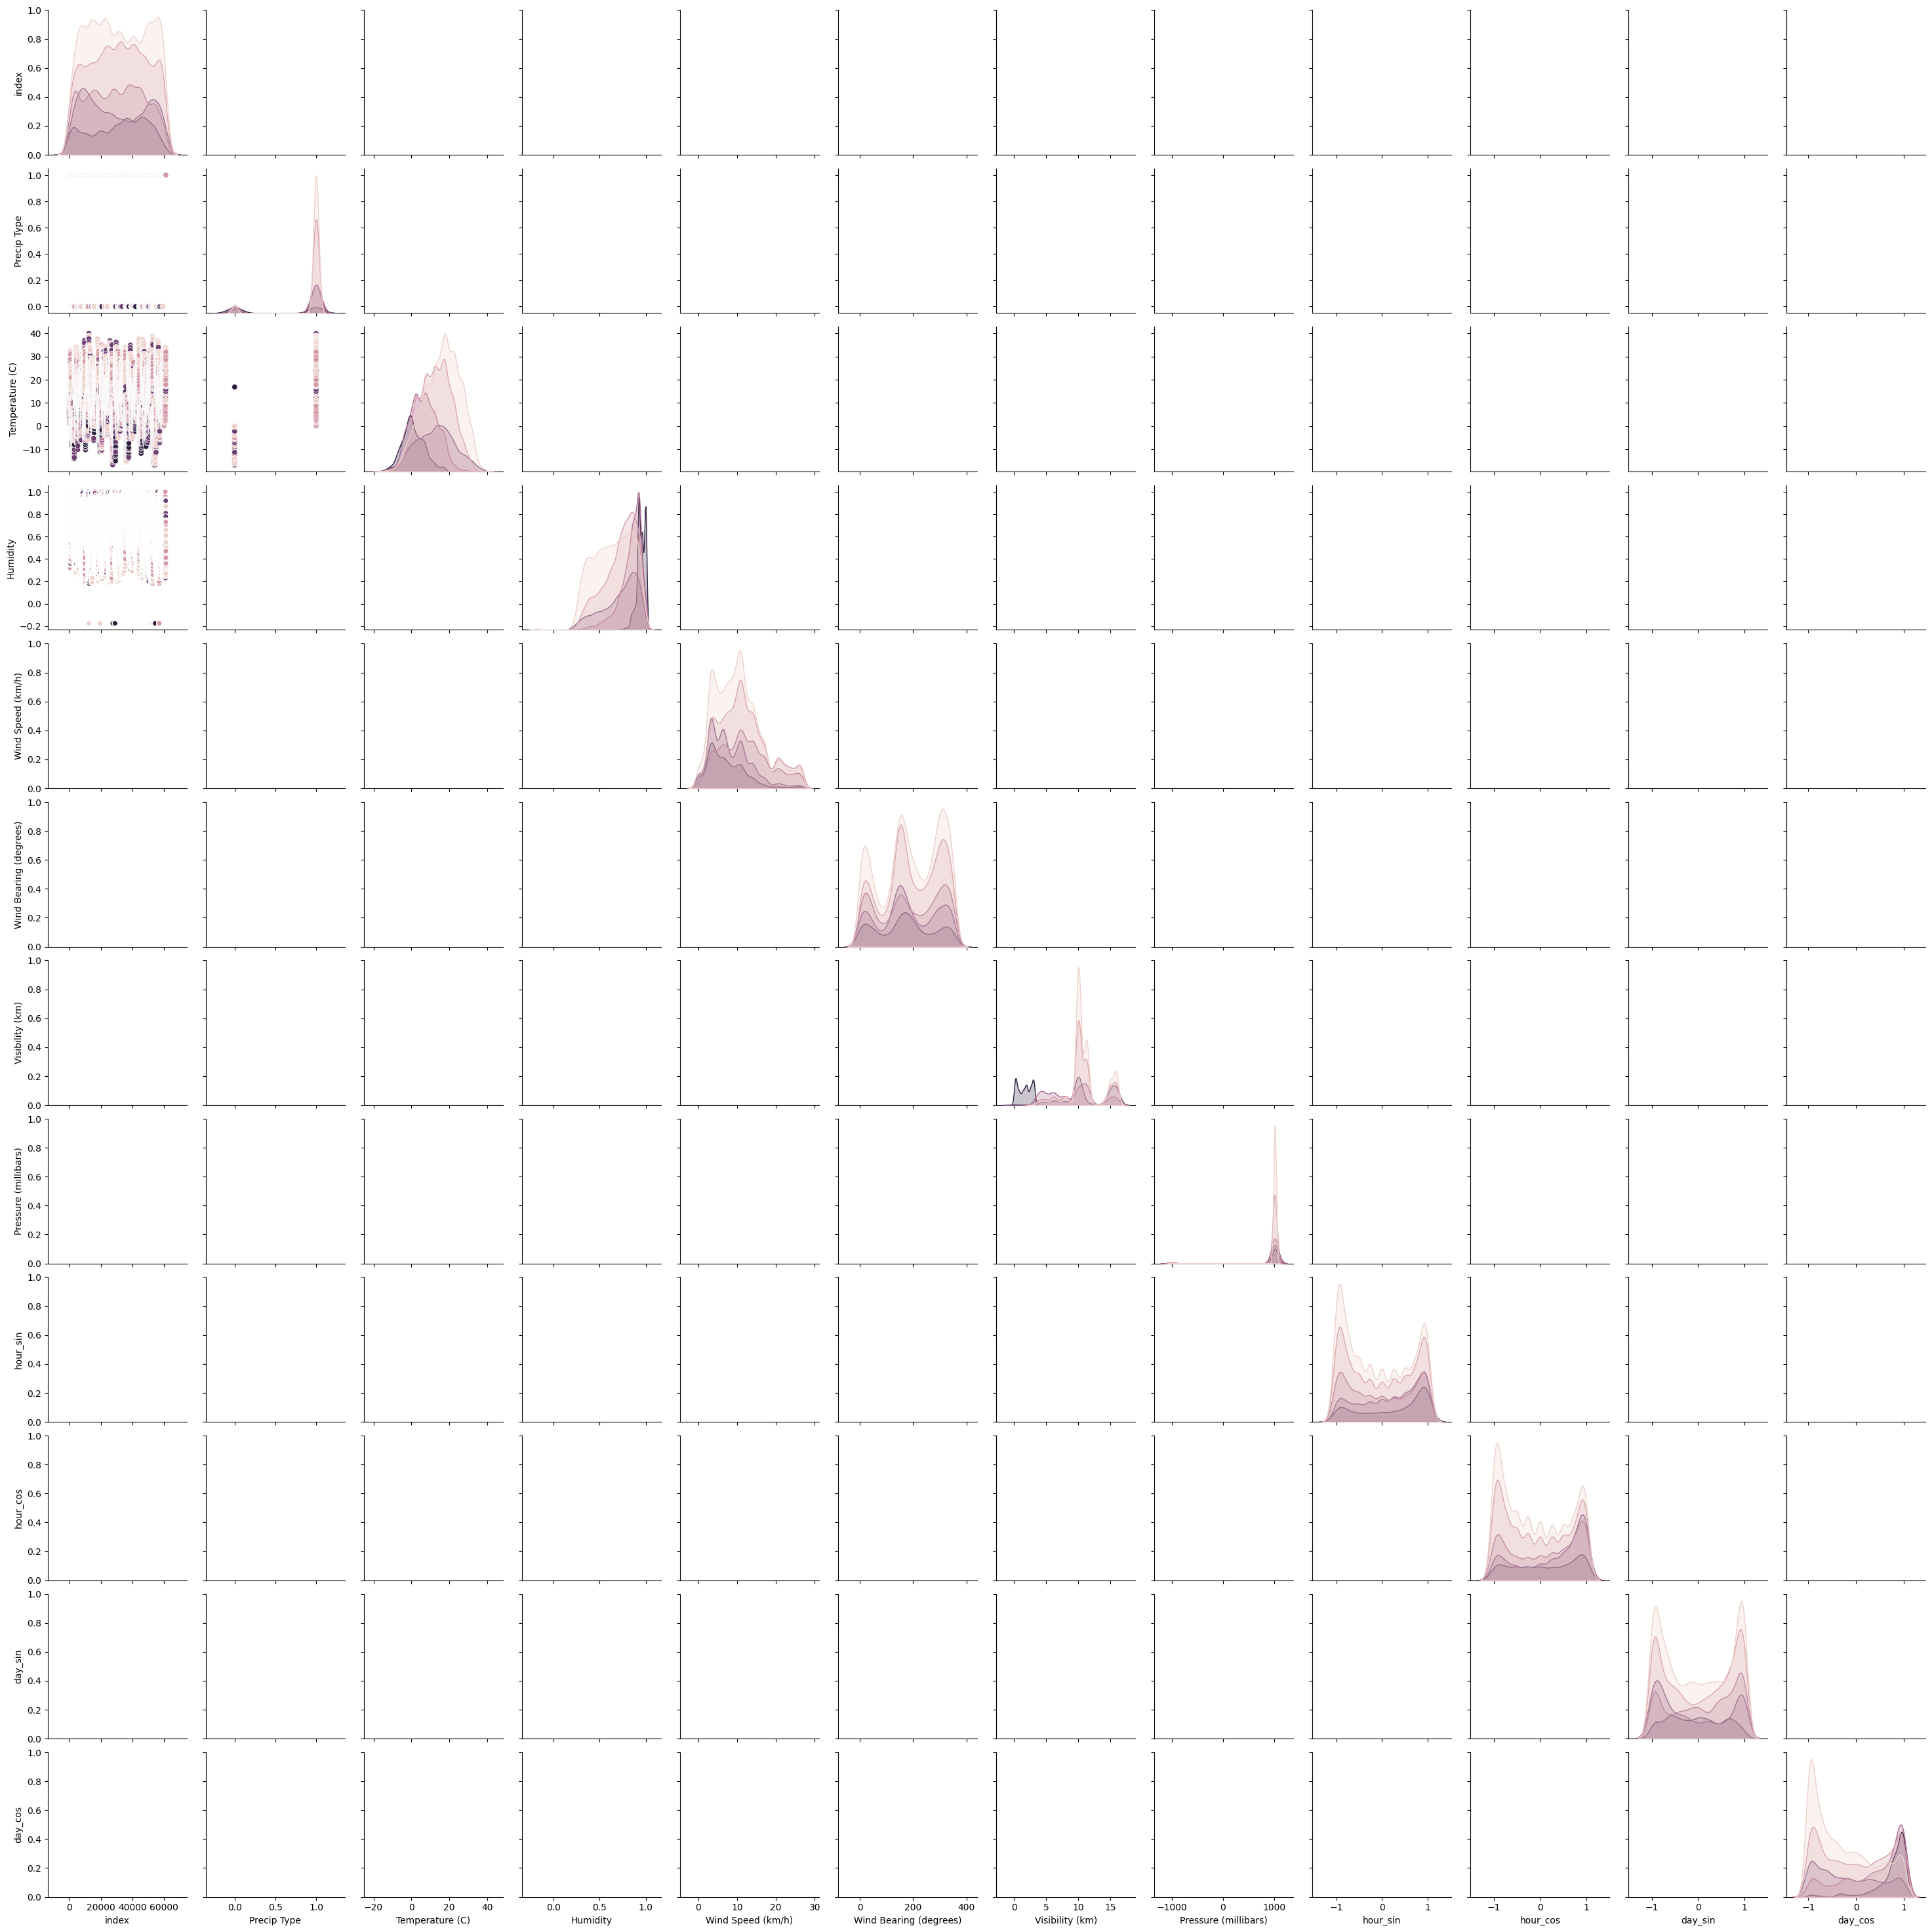

In [ ]:
sns.pairplot(df,hue="Summary")

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[3079  669  116  399    0]
 [ 906 1950  398  116    0]
 [ 116  380 1495   36    0]
 [ 446   67   45 1057    0]
 [   0    0    0    0  949]]
0.6978075916230366
              precision    recall  f1-score   support

         1.0       0.68      0.72      0.70      4263
         2.0       0.64      0.58      0.61      3370
         3.0       0.73      0.74      0.73      2027
         4.0       0.66      0.65      0.66      1615
         5.0       1.00      1.00      1.00       949

    accuracy                           0.70     12224
   macro avg       0.74      0.74      0.74     12224
weighted avg       0.70      0.70      0.70     12224



In [ ]:
xgb = XGBClassifier()
import numpy as np

# Convert the target variable to integer

y = y_train_res.astype(int)
y_mapped = y - 1
xgb.fit(X_train_res, y_mapped)
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test.astype(int),y_pred6))
print(accuracy_score(y_test.astype(int),y_pred6))
print(classification_report(y_test.astype(int),y_pred6))

[[   0    0    0    0    0    0]
 [3009  714  161  379    0    0]
 [1096 1665  473  136    0    0]
 [ 193  446 1350   38    0    0]
 [ 575   78   51  911    0    0]
 [   0    0    0    0  949    0]]
0.10021269633507854
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.25      0.17      0.20      4263
           2       0.23      0.14      0.18      3370
           3       0.03      0.02      0.02      2027
           4       0.00      0.00      0.00      1615
           5       0.00      0.00      0.00       949

    accuracy                           0.10     12224
   macro avg       0.08      0.05      0.07     12224
weighted avg       0.15      0.10      0.12     12224



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
svc = SVC()
svc.fit(X_train_res, y_train_res)
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[1046  446   16 1097 1658]
 [ 742  381   46  697 1504]
 [ 358  210   55  497  907]
 [ 369  161   19  481  585]
 [ 193   84   15  137  520]]
0.203125
              precision    recall  f1-score   support

         1.0       0.39      0.25      0.30      4263
         2.0       0.30      0.11      0.16      3370
         3.0       0.36      0.03      0.05      2027
         4.0       0.17      0.30      0.21      1615
         5.0       0.10      0.55      0.17       949

    accuracy                           0.20     12224
   macro avg       0.26      0.25      0.18     12224
weighted avg       0.31      0.20      0.20     12224



In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# calculate the test accuracy of the model
test_accuracy = lr.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

Test accuracy: 0.28


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Assume X and y are your data and target variables
kf = KFold(n_splits=5, shuffle=True)
lr = LinearRegression()

# Loop over the folds and fit the model
for train_idx, test_idx in kf.split(X):
    X_train, y_train = X.iloc[train_idx], Y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], Y.iloc[test_idx]
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    print("Accuracy:", score)


Accuracy: 0.29608991957680775
Accuracy: 0.26457233180643047
Accuracy: 0.288602516394437
Accuracy: 0.2798467203833922
Accuracy: 0.3090105956251513


In [ ]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# Define the model with hyperparameters
model = MLPClassifier(learning_rate_init=0.001, max_iter=3000)

# Define the number of folds for k-fold cross-validation
k = 4
kf = KFold(n_splits=k, shuffle=True)

# Loop over the folds
scores = []
for train_idx, test_idx in kf.split(X):
    # Split the data into train and test sets
    X_train, y_train = X.iloc[train_idx], Y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], Y.iloc[test_idx]
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    score = model.score(X_test, y_test)
    scores.append(score)

# Compute the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Mean accuracy: {mean_score:.3f} +/- {std_score:.3f}")


Mean accuracy: 0.318 +/- 0.070


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[2450 1476  420  477  481]
 [1554 1291  491  388  548]
 [ 509  691  406  180  740]
 [ 676  551  112  258  394]
 [  36  135   20   36  959]]
0.35107009621048496
              precision    recall  f1-score   support

         1.0       0.47      0.46      0.47      5304
         2.0       0.31      0.30      0.31      4272
         3.0       0.28      0.16      0.20      2526
         4.0       0.19      0.13      0.15      1991
         5.0       0.31      0.81      0.45      1186

    accuracy                           0.35     15279
   macro avg       0.31      0.37      0.32     15279
weighted avg       0.35      0.35      0.34     15279



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=3000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.6 MB/s eta 0:00:00
Learning rate set to 0.03923
0:	total: 137ms	remaining: 6m 49s
1:	total: 230ms	remaining: 5m 45s
2:	total: 326ms	remaining: 5m 25s
3:	total: 402ms	remaining: 5m 1s
4:	total: 482ms	remaining: 4m 48s
5:	total: 561ms	remaining: 4m 39s
6:	total: 639ms	remaining: 4m 33s
7:	total: 730ms	remaining: 4m 32s
8:	total: 803ms	remaining: 4m 26s
9:	total: 882ms	remaining: 4m 23s
10:	total: 962ms	remaining: 4m 21s
11:	total: 1.05s	remaining: 4m 21s
12:	total: 1.13s	remaining: 4m 19s
13:	total: 1.22s	remaining: 4m 21s
14:	total: 1.31s	remaining: 4m 19s
15:	total: 1.39s	remaining: 4m 19s
16:	total: 1.47s	remaining: 4m 18s
17:	total: 1.55s	remaining: 4m 17s
18:	total: 1.63s	remaining: 4m 16s
19:	total: 1.72s	remaining: 4m 16s
20:	total: 1.8s	remaining: 4m 15s
21:	total: 1.89s	remaining: 4m 15s
22:	total: 1.96s	remaining: 4m 14s

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

#training the model
nb.fit(X_train,y_train)

#testing the model
y_pred=nb.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.46050134171084495

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_leaf_nodes=50, random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.5256888539825905

In [ ]:
for i in range (1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_res, y_train_res)
  y_pred4 = knn.predict(X_test)
  #print(confusion_matrix(y_test,y_pred4))
  print(accuracy_score(y_test,y_pred4))
  #print(classification_report(y_test,y_pred4))

0.9271549185156096
0.8426598599384777
0.7839518293082008
0.7662150664310492
0.7306760913672361
0.7196151580600825
0.6925191439230316
0.6889848812095032
0.6698736828326461
0.6624124615485306
